In [1]:
# Obviously, import needed packages
# Hint: this time, you'll also need Seaborn!
import seaborn as sb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

##  Time for practicing Pandas operation using the penguins dataset you worked with last week!

In [1]:
import urllib.request # module for downloading data from URLs
import chardet
import seaborn as sb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### FROM LAST WEEK, CAN COPY + PASTE:  Read in 'penguins_size.csv' using Pandas, remove NANs.

#### (1)  Print out the entries of penguins with a beak length greater than 36 mm

In [3]:
f = open('penguins_size.csv', 'rb').read()
result = chardet.detect(f)
encode = result['encoding']
index = ['species', 'island', 'culmen_length_mm',  'culmen_depth_mm',  'flipper_length_mm', 'body_mass_g', 'sex']
tdata = pd.read_csv('penguins_size.csv', engine='python', encoding=encode, usecols=index)
tdata = tdata.dropna()

tdata.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


#### (2)  How many penguins are there in this dataset with a beak length greater than 36 mm?


In [9]:
res = len(tdata.query('culmen_length_mm > 36'))
print(f'There are {res} penguins')

There are 121 penguins


#### (3)  How many penguins have a beak length greater than 36 mm AND less than 40 mm?

In [11]:
res = len(tdata.query('culmen_length_mm > 36 and culmen_length_mm < 40'))
print(f'There are {res} penguins')

There are 71 penguins


#### (4)  Create a new column in the dataframe called 'beaker ratio', which consists of the values of beak length divided by values of beak depth.

In [13]:
tdata = tdata.assign(beaker_ratio=tdata['culmen_length_mm']/tdata['culmen_depth_mm'])
tdata

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,beaker_ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2.090909
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,2.270115
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,2.238889
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.901554
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1.907767
...,...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE,1.989130
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE,2.022472
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE,2.088398
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE,2.105263


#### (5)  Create a scatterplot of body mass vs. flipper length, using the beak length column to control color of scatter plots, and using a colormap of your choice
- it can be very insightful to control color based on values of another variable, in this case another penguin characteristic, yes?
<br><br>
- why don't you also change the colormap from the default? your choice of which new colormap to use

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

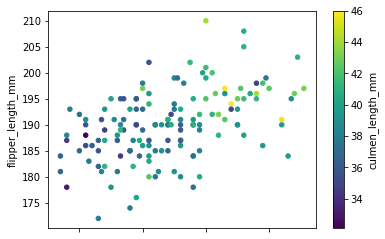

In [20]:
tdata.plot.scatter(
    x='body_mass_g',
    y='flipper_length_mm',
    c='culmen_length_mm',
    colormap='viridis'
)

#### (6)  From your plot in (5), what do you notice about the penguins with shorter beak length?  

- Penguins with shorter beak length tend to be lighter in mass and on average have shorter flippers than their heavier counterparts with longer beaks.

#### (7) A single scatterplot is interesting, but there's value and convenience in a *scatterplot matrix*, especially in the EDA process.  Create one.
- Please use Seaborn

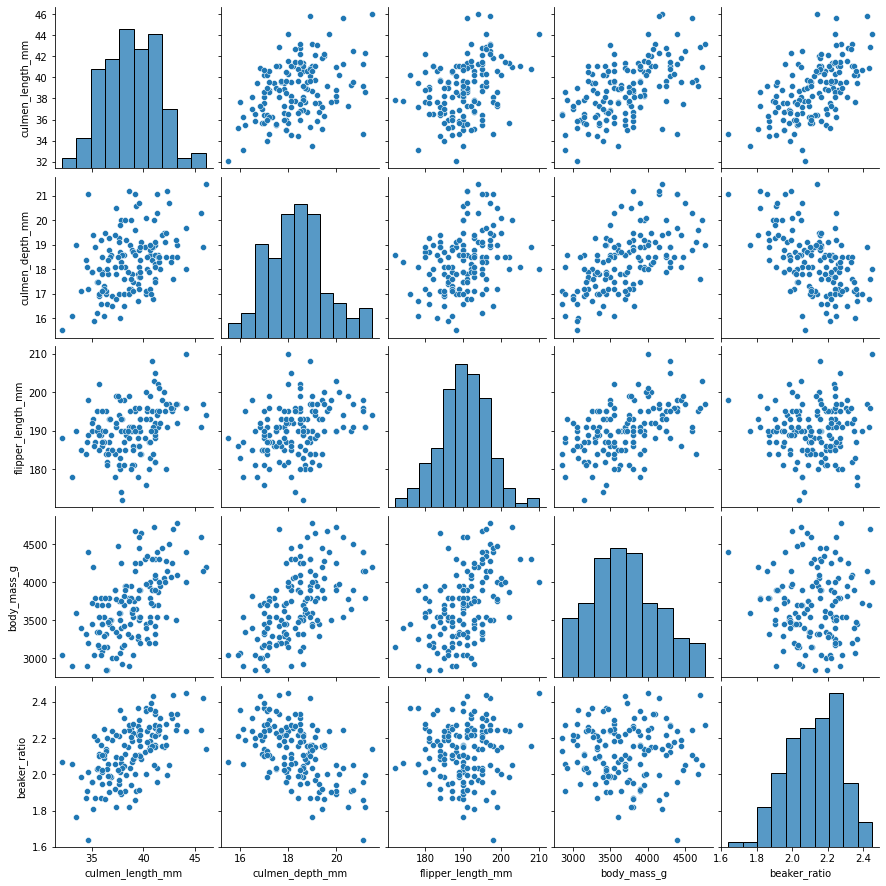

In [21]:
sb.pairplot(tdata)

#### (8) And now create a heatmap! 
- Yes, there's only a few numerical values, so this will be a small one!
- Please use Seaborn

<AxesSubplot:>

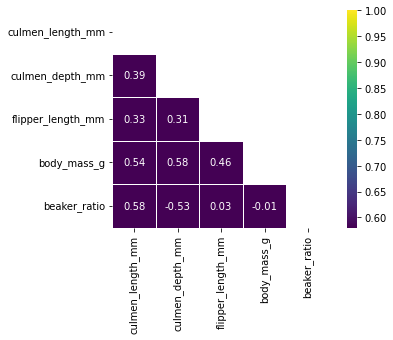

In [23]:
cmap = 'viridis'
car_corr = tdata.corr()
mask = np.triu(np.ones_like(car_corr, dtype=bool))
sb.heatmap(car_corr, mask=mask, annot=True, fmt=".2f",
          cmap=cmap, vmin=1, square=True, linewidth=1)